In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook", "grid"])

In [59]:
def forward_difference(x: np.ndarray, y: np.ndarray, n_derivs: int) -> np.ndarray:
    """ Forward difference formula for numerical differentiation for 1D arrays
        func: Function to differentiate
        x (np.ndarray): x values(independent variable)
        y (np.ndarray): y values(dependent variable)
        n_derivs (int): Number of derivatives to take
    Returns:
        np.ndarray: Numerical derivative
    """
    len_x, len_y = len(x), len(y)
    if len_x != len_y:
        raise ValueError("x and y must have the same length")
    if n_derivs < 1 or n_derivs > len_x:
        raise ValueError("n_derivs must be greater than 0 and less than length of x")
    
    # Initialse a 2d array of size (n_derivs, len_x) with initial y values
    derivatives = np.full((n_derivs, len_x), y)
    h = x[1] - x[0] # Step size
    derivatives = []

    # Calculate the derivatives
    for deriv_idx in range(1, n_derivs):
        y = np.array(y)
        deriv = np.diff(y) / h
        deriv = np.pad(deriv, (0, deriv_idx), "constant", constant_values=np.nan)
        # derivatives[deriv_idx + 1] = deriv
        derivatives.append(deriv)
        y = deriv

    return derivatives

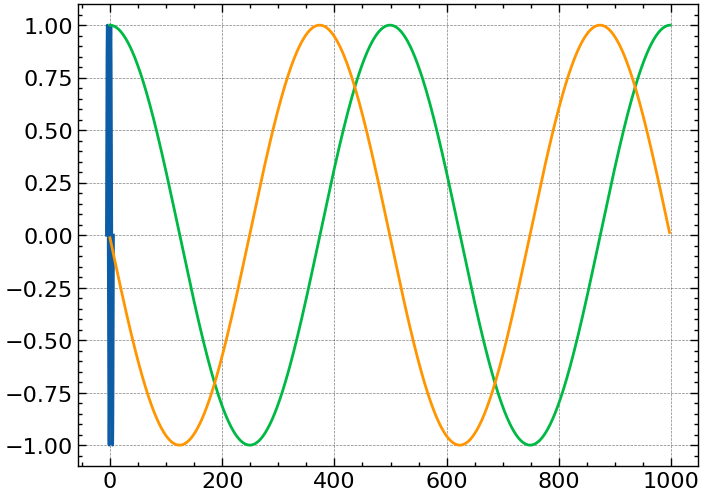

In [65]:
func = lambda x: np.sin(x)
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
y = func(x)
n_derivs = 3
len_x = len(x)
h = x[1] - x[0]

derivatives = forward_difference(x, y, n_derivs)
plt.plot(x, y, label="sin(x)")
for deriv_idx in range(n_derivs - 1):
    plt.plot(derivatives[deriv_idx], label=f"Derivative {deriv_idx + 1}")

In [25]:
deriv = np.pad(np.diff(derivatives[2 - 1]) / h, (0, 1), constant_values=0, mode="constant")
derivatives[2, :] = deriv
derivatives

array([[  1,   4,   9,  16,  25,  36],
       [  3,   5,   7,   9,  11,   0],
       [  2,   2,   2,   2, -11,   0]])

In [24]:
f = lambda x: np.sin(x)
x = np.linspace(-2*np.pi, 2*np.pi, 100)
h = 0.001
n_derivs = 5

derivs = forward_difference(f, x, h, n_derivs)

Text(0.5, 0, '$x$')

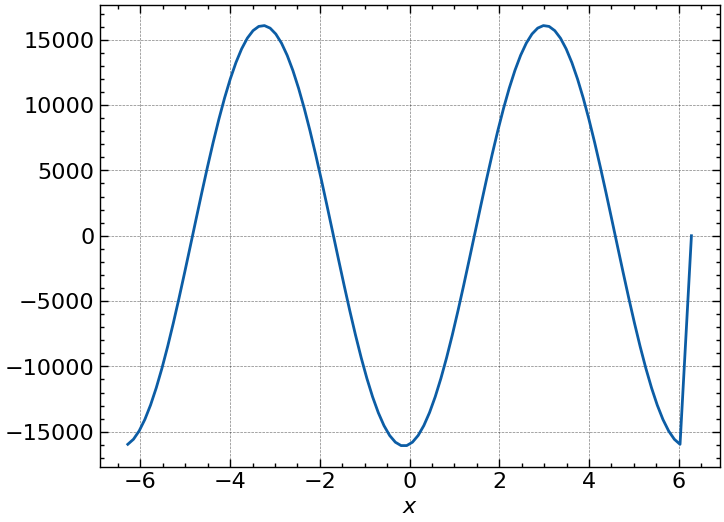

In [25]:
# plt.plot(x, derivs[0], label="Numerical deriv 1")
# plt.plot(x, derivs[1], label="Numerical deriv 2")
plt.plot(x, derivs[2], label="Numerical deriv 3")
# plt.plot(x, derivs[3], label="Numerical deriv 4")
# plt.plot(x, derivs[4], label="Numerical deriv 5")
plt.xlabel("$x$")